#### Regression

#### Step 1: Data Generation
generate the target `y` using fixed random weights (`w` and `b`) through a formula

Later, the model will receive `X` and `y` and try to **learn**(if the model can discover) those weights(the same relationship we used to create the data) by itself.   

In [2]:
import torch
print(torch.__version__)
torch.manual_seed(1337)

2.4.1


In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
X=torch.randn(120,8)

w=torch.randn(8,1)
b=torch.randn(1)
noise=torch.randn(120,1)*0.5
y=X@w+b+noise

print("w =", w)
print("w.shape =", w.shape)

print("b =", b)
print("b.shape =", b.shape)

y.shape

w = tensor([[ 1.5318e+00],
        [ 1.1253e-01],
        [ 2.2517e+00],
        [-1.4184e+00],
        [ 9.8485e-01],
        [ 3.4842e-01],
        [-1.2332e+00],
        [-1.5374e-03]])
w.shape = torch.Size([8, 1])
b = tensor([-1.2564])
b.shape = torch.Size([1])


torch.Size([120, 1])

In this task, we **simulate** data to test the model’s ability to learn.
We first generate `y` = X @ w + b + noise using fixed random weights — so we already know the “true” `w` and `b`.
The model then receives `(X, y)` and tries to **learn** those values on its own.

In real-world tasks (e.g., predicting house prices), we already have both `X` and `y` from real data.
The model doesn’t know the “true” weights — it just learns the best ones that fit the data.

Whether in this task or in a real-world scenario, the principle is the same: once we have y, the model keeps adjusting its weights to minimize the difference between its predicted ŷ and the true y.

#### Step 2: Model Definition

In [5]:
class RevenueNet(nn.Module):
    def __init__(self):
        super(RevenueNet, self).__init__()
        self.fc1 = nn.Linear(8, 16)  
        self.fc2 = nn.Linear(16, 8)  
        self.output = nn.Linear(8, 1)   
        self.relu = nn.ReLU()            

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.output(x)

In [13]:
model = RevenueNet()
print(model)

RevenueNet(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [14]:
loss_function = nn.MSELoss()              
optimiser = optim.Adam(model.parameters(), lr=0.010)

#### Step 3: Model Setup

In each training step, the model **substitutes X into the current parameters (w and b) to get the predicted y**.
The first set of parameters (w, b) is randomly initialized(as above stored in the **variables w and b**).

Like:(first set of parameters (w, b)(e.g., 0.3 and 0.5))
| Stage          | w   | b   | Model Formula | Predicted y (ŷ)      | True y       | Loss   |
| -------------- | --- | --- | ------------- | -------------------- | ------------ | ------ |
| Initial        | 0.3 | 0.5 | 0.3x + 0.5    | [0.8, 1.1, 1.4, 1.7] | [3, 5, 7, 9] | 26.175 |
| After Learning | 2.0 | 1.0 | 2x + 1        | [3, 5, 7, 9]         | [3, 5, 7, 9] | ≈ 0    |


In [18]:
epochs = 30
losses = []

for epoch in range(epochs):
    optimiser.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    
    loss.backward()
    optimiser.step()
    
    losses.append(loss.item())
    print(f"Epoch {epoch+1:02d} | Loss: {loss.item():.6f}")

Epoch 01 | Loss: 0.310246
Epoch 02 | Loss: 0.299768
Epoch 03 | Loss: 0.288715
Epoch 04 | Loss: 0.277744
Epoch 05 | Loss: 0.267216
Epoch 06 | Loss: 0.257923
Epoch 07 | Loss: 0.249868
Epoch 08 | Loss: 0.242835
Epoch 09 | Loss: 0.236250
Epoch 10 | Loss: 0.231109
Epoch 11 | Loss: 0.226990
Epoch 12 | Loss: 0.223221
Epoch 13 | Loss: 0.220929
Epoch 14 | Loss: 0.219116
Epoch 15 | Loss: 0.216527
Epoch 16 | Loss: 0.212570
Epoch 17 | Loss: 0.207882
Epoch 18 | Loss: 0.203416
Epoch 19 | Loss: 0.199582
Epoch 20 | Loss: 0.196699
Epoch 21 | Loss: 0.194466
Epoch 22 | Loss: 0.192481
Epoch 23 | Loss: 0.190410
Epoch 24 | Loss: 0.188214
Epoch 25 | Loss: 0.186197
Epoch 26 | Loss: 0.184753
Epoch 27 | Loss: 0.183196
Epoch 28 | Loss: 0.181316
Epoch 29 | Loss: 0.179379
Epoch 30 | Loss: 0.177412


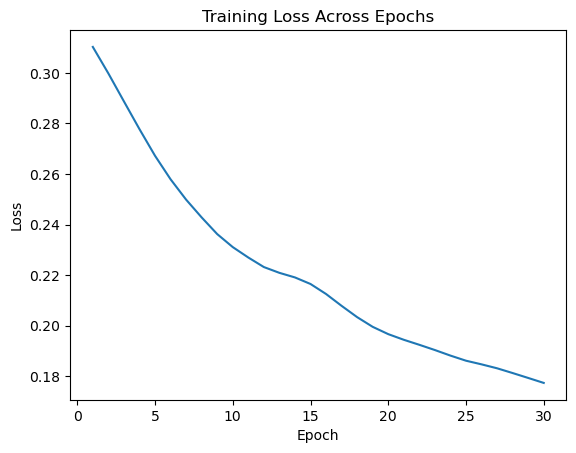

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1, epochs+1), losses)  # plot(x,y)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Across Epochs")
plt.show()